# Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import xgboost as xgb
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder

# Loading the Data File

In [2]:
apprec = pd.read_csv('C:/My Folder/UTD/Semester/Spring_2023/BUAN_6341_Applied_Machine_Learning/Project Proposal/application_record.csv')
crerec = pd.read_csv('C:/My Folder/UTD/Semester/Spring_2023/BUAN_6341_Applied_Machine_Learning/Project Proposal/credit_record.csv')

# Exploratory Data Analysis

# Bar Chart for Binary Data

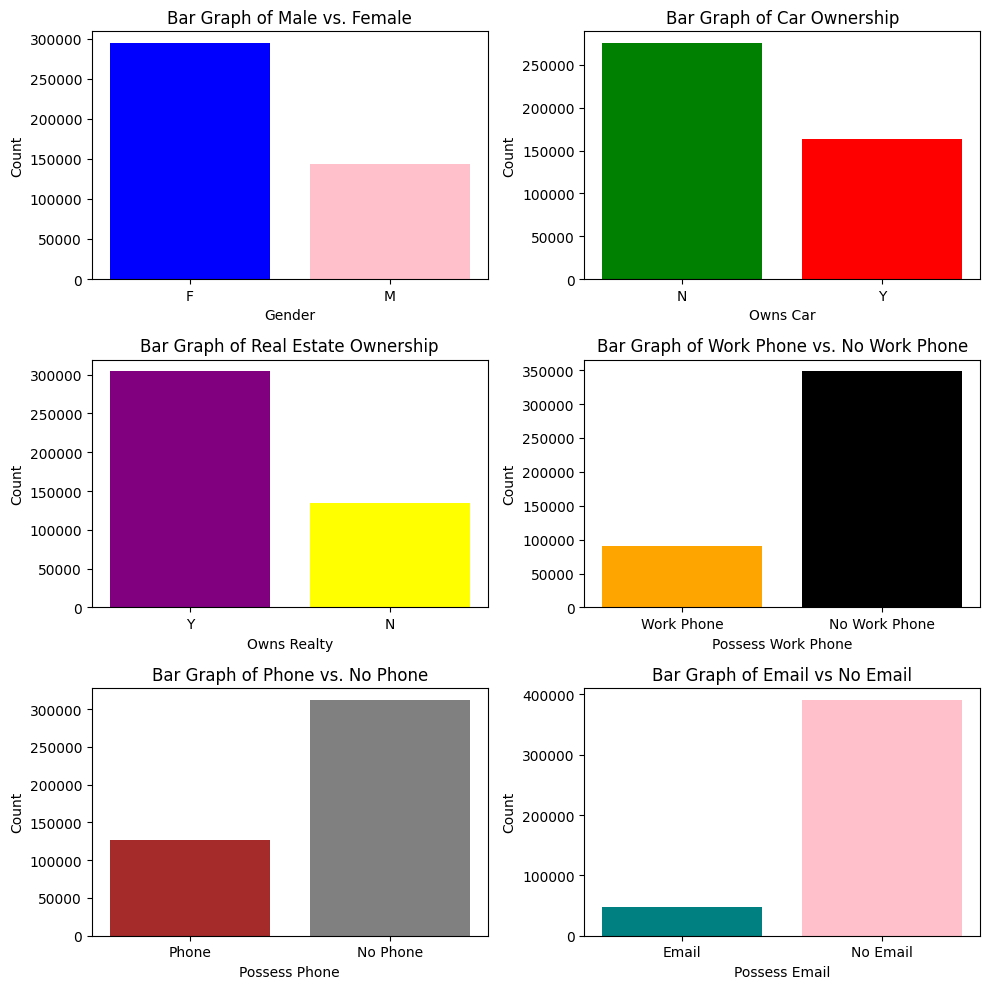

In [3]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Plot bar graph of CODE_GENDER column
gender_counts = apprec['CODE_GENDER'].value_counts()
axs[0, 0].bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
axs[0, 0].set_title("Bar Graph of Male vs. Female")
axs[0, 0].set_xlabel("Gender")
axs[0, 0].set_ylabel("Count")

# Plot bar graph of FLAG_OWN_CAR column
car_counts = apprec['FLAG_OWN_CAR'].value_counts()
axs[0, 1].bar(car_counts.index, car_counts.values, color=['green', 'red'])
axs[0, 1].set_title("Bar Graph of Car Ownership")
axs[0, 1].set_xlabel("Owns Car")
axs[0, 1].set_ylabel("Count")

# Plot bar graph of FLAG_OWN_REALTY column
realty_counts = apprec['FLAG_OWN_REALTY'].value_counts()
axs[1, 0].bar(realty_counts.index, realty_counts.values, color=['purple', 'yellow'])
axs[1, 0].set_title("Bar Graph of Real Estate Ownership")
axs[1, 0].set_xlabel("Owns Realty")
axs[1, 0].set_ylabel("Count")


# Bar graph of Work Phone vs. No Work Phone
labels = ["Work Phone", "No Work Phone"]
values = [apprec["FLAG_WORK_PHONE"].sum(), len(apprec) - apprec["FLAG_WORK_PHONE"].sum()]
axs[1, 1].bar(labels, values, color=['orange','black'])
axs[1, 1].set_title("Bar Graph of Work Phone vs. No Work Phone")
axs[1, 1].set_xlabel("Possess Work Phone")
axs[1, 1].set_ylabel("Count")

# Bar graph of Phone vs. No Phone
labels = ["Phone", "No Phone"]
values = [apprec["FLAG_PHONE"].sum(), len(apprec) - apprec["FLAG_PHONE"].sum()]
axs[2, 0].bar(labels, values, color=['brown', 'gray'])
axs[2, 0].set_title("Bar Graph of Phone vs. No Phone")
axs[2, 0].set_xlabel("Possess Phone")
axs[2, 0].set_ylabel("Count")

# Bar graph of Email vs No Email
labels = ["Email", "No Email"]
values = [apprec["FLAG_EMAIL"].sum(), len(apprec) - apprec["FLAG_EMAIL"].sum()]
axs[2, 1].bar(labels, values, color=['teal', 'pink'])
axs[2, 1].set_title("Bar Graph of Email vs No Email")
axs[2, 1].set_xlabel("Possess Email")
axs[2, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Histogram

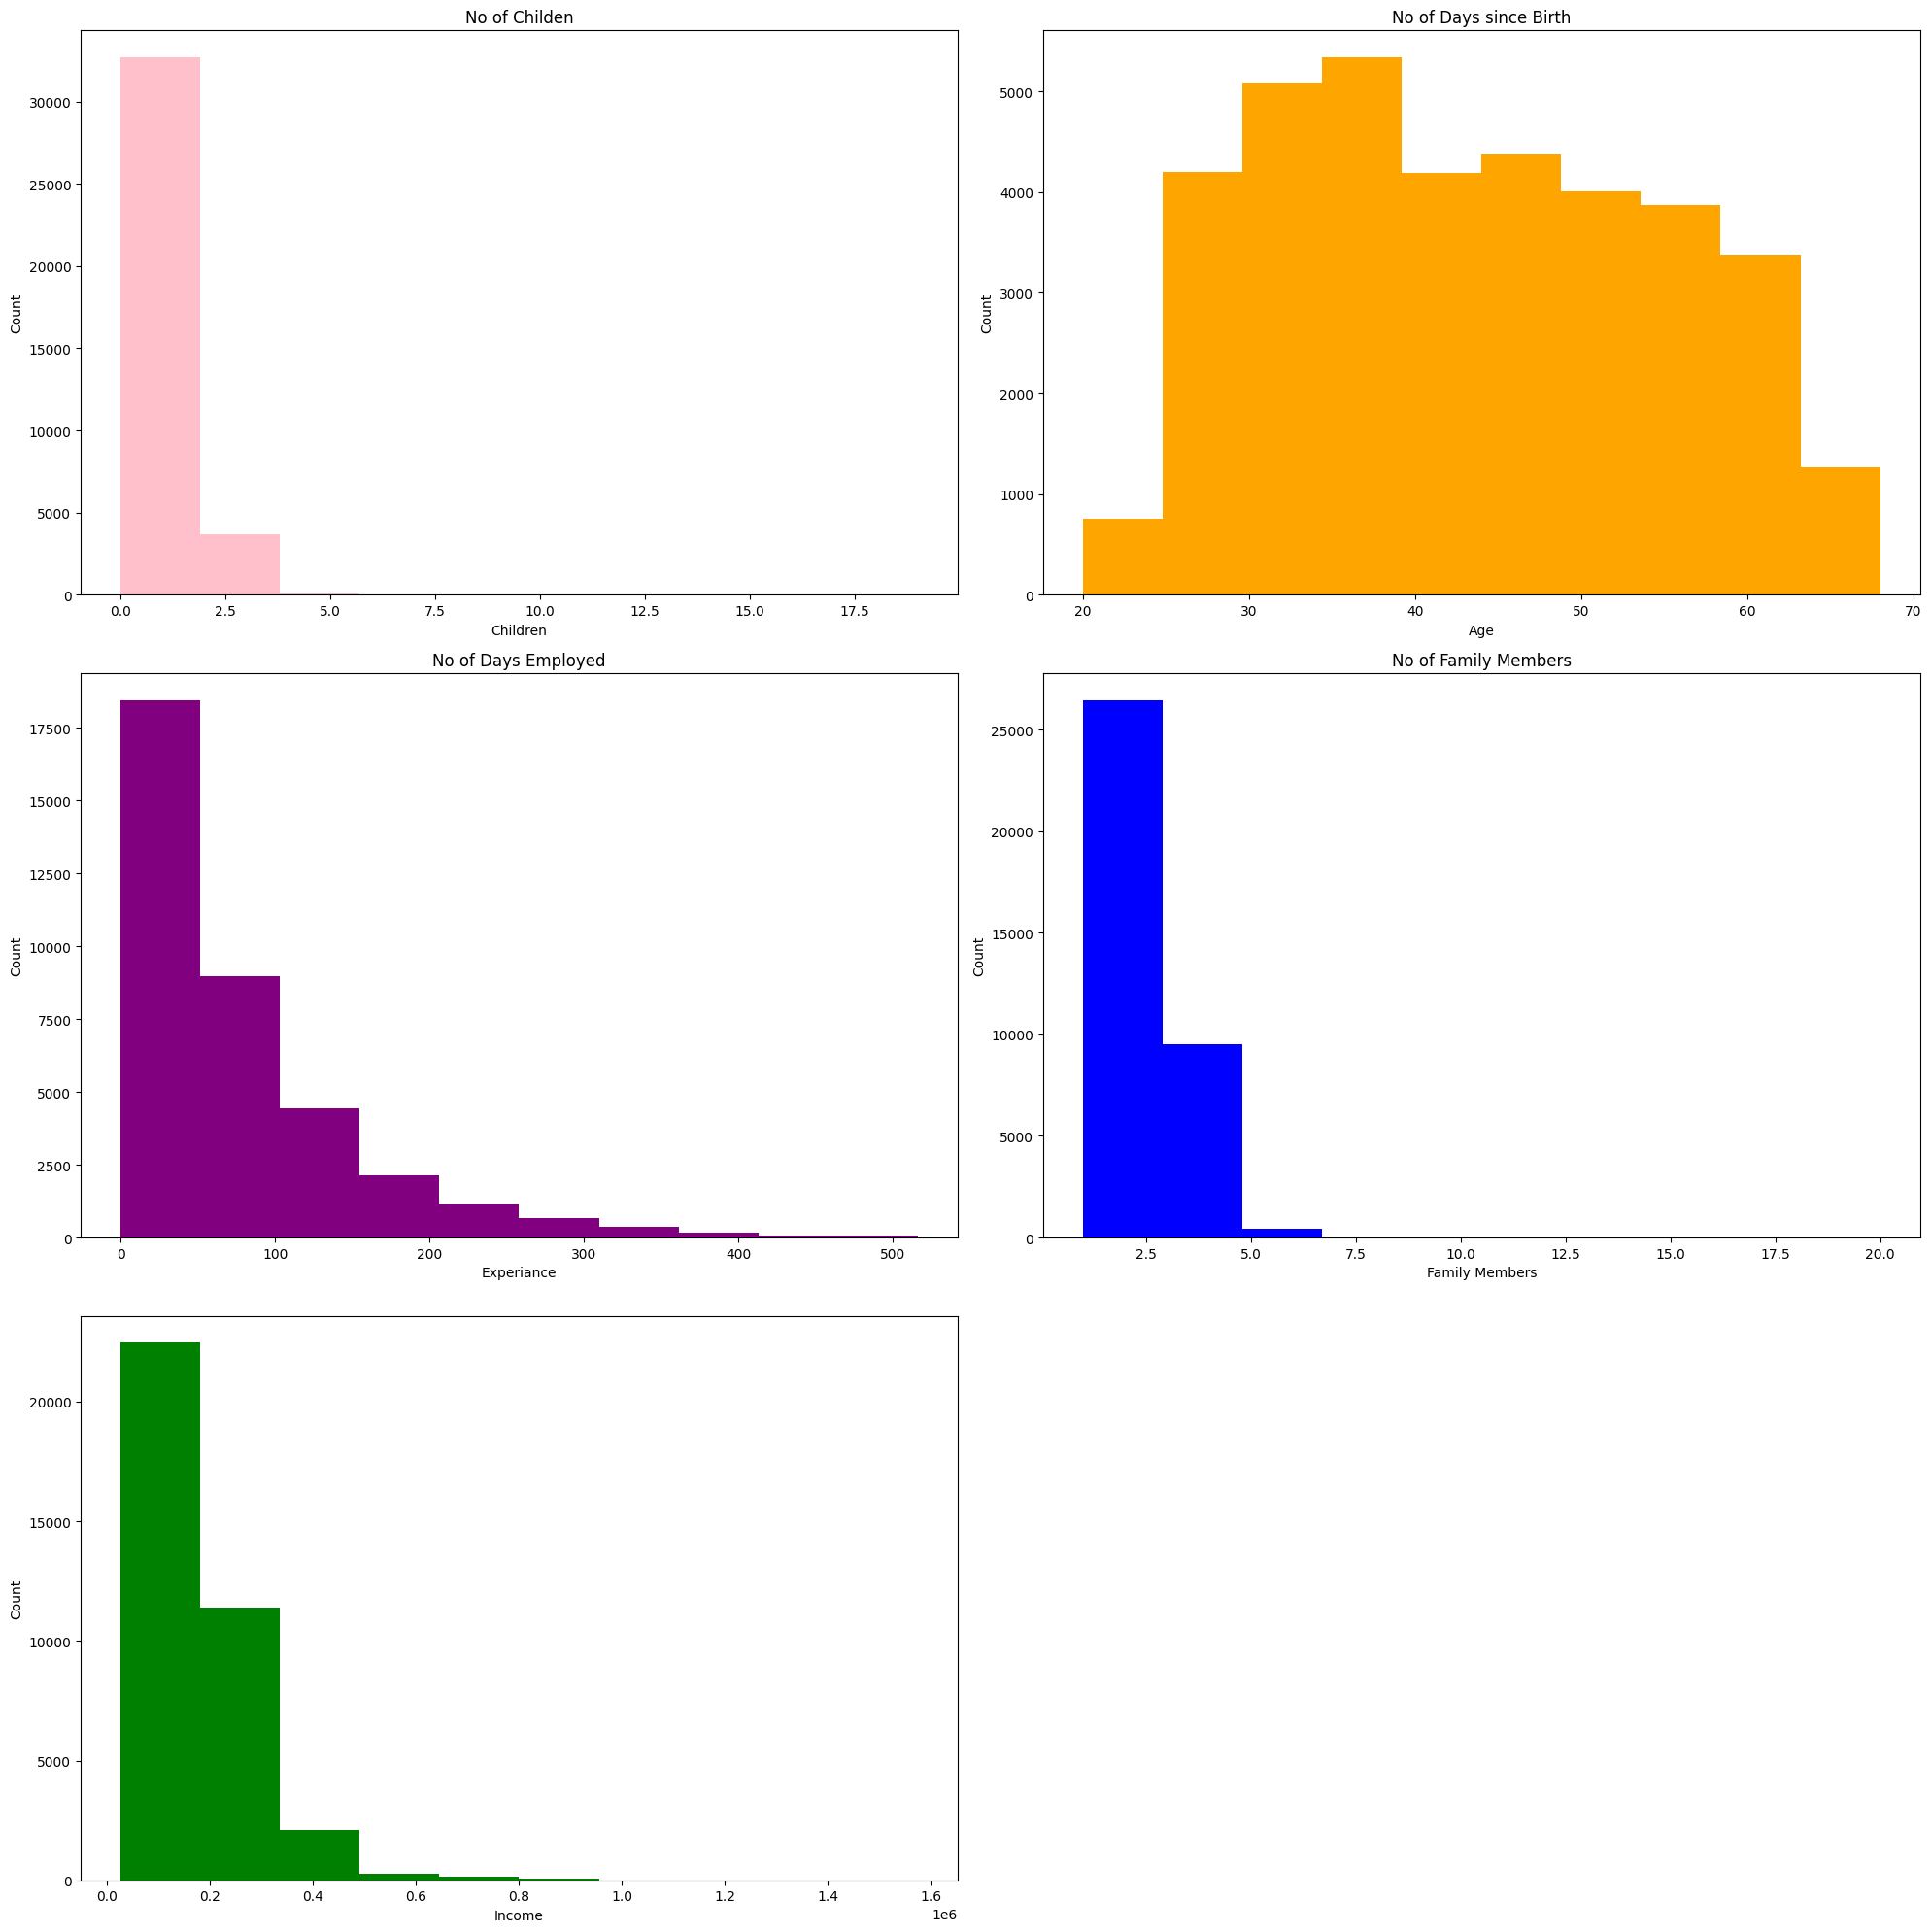

In [17]:
import matplotlib.pyplot as plt

# create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Histogram of No of Childen
axs[0, 0].hist(apprec['CNT_CHILDREN'], color='pink')
axs[0, 0].set_title("No of Childen")
axs[0, 0].set_xlabel("Children")
axs[0, 0].set_ylabel("Count")

# Histogram of No of Days since Birth
axs[0, 1].hist(apprec['AGE'], color='orange')
axs[0, 1].set_title("No of Days since Birth")
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Count")

# Histogram of No of Days Employed
axs[1, 0].hist(apprec['EXPERIANCE_IN_MONTHS'], color='purple')
axs[1, 0].set_title("No of Days Employed")
axs[1, 0].set_xlabel("Experiance")
axs[1, 0].set_ylabel("Count")

# Histogram of No of Family Members
axs[1, 1].hist(apprec['CNT_FAM_MEMBERS'], color='blue')
axs[1, 1].set_title("No of Family Members")
axs[1, 1].set_xlabel("Family Members")
axs[1, 1].set_ylabel("Count")

# Histogram of Total Income
axs[2, 0].hist(apprec['AMT_INCOME_TOTAL'], color='green')
axs[2, 0].set_xlabel("Income")
axs[2, 0].set_ylabel("Count")

# Hide the last subplot
fig.delaxes(axs[2, 1])

# display the subplots
plt.tight_layout()
plt.show()

# Bar Chart for Categorical Fields

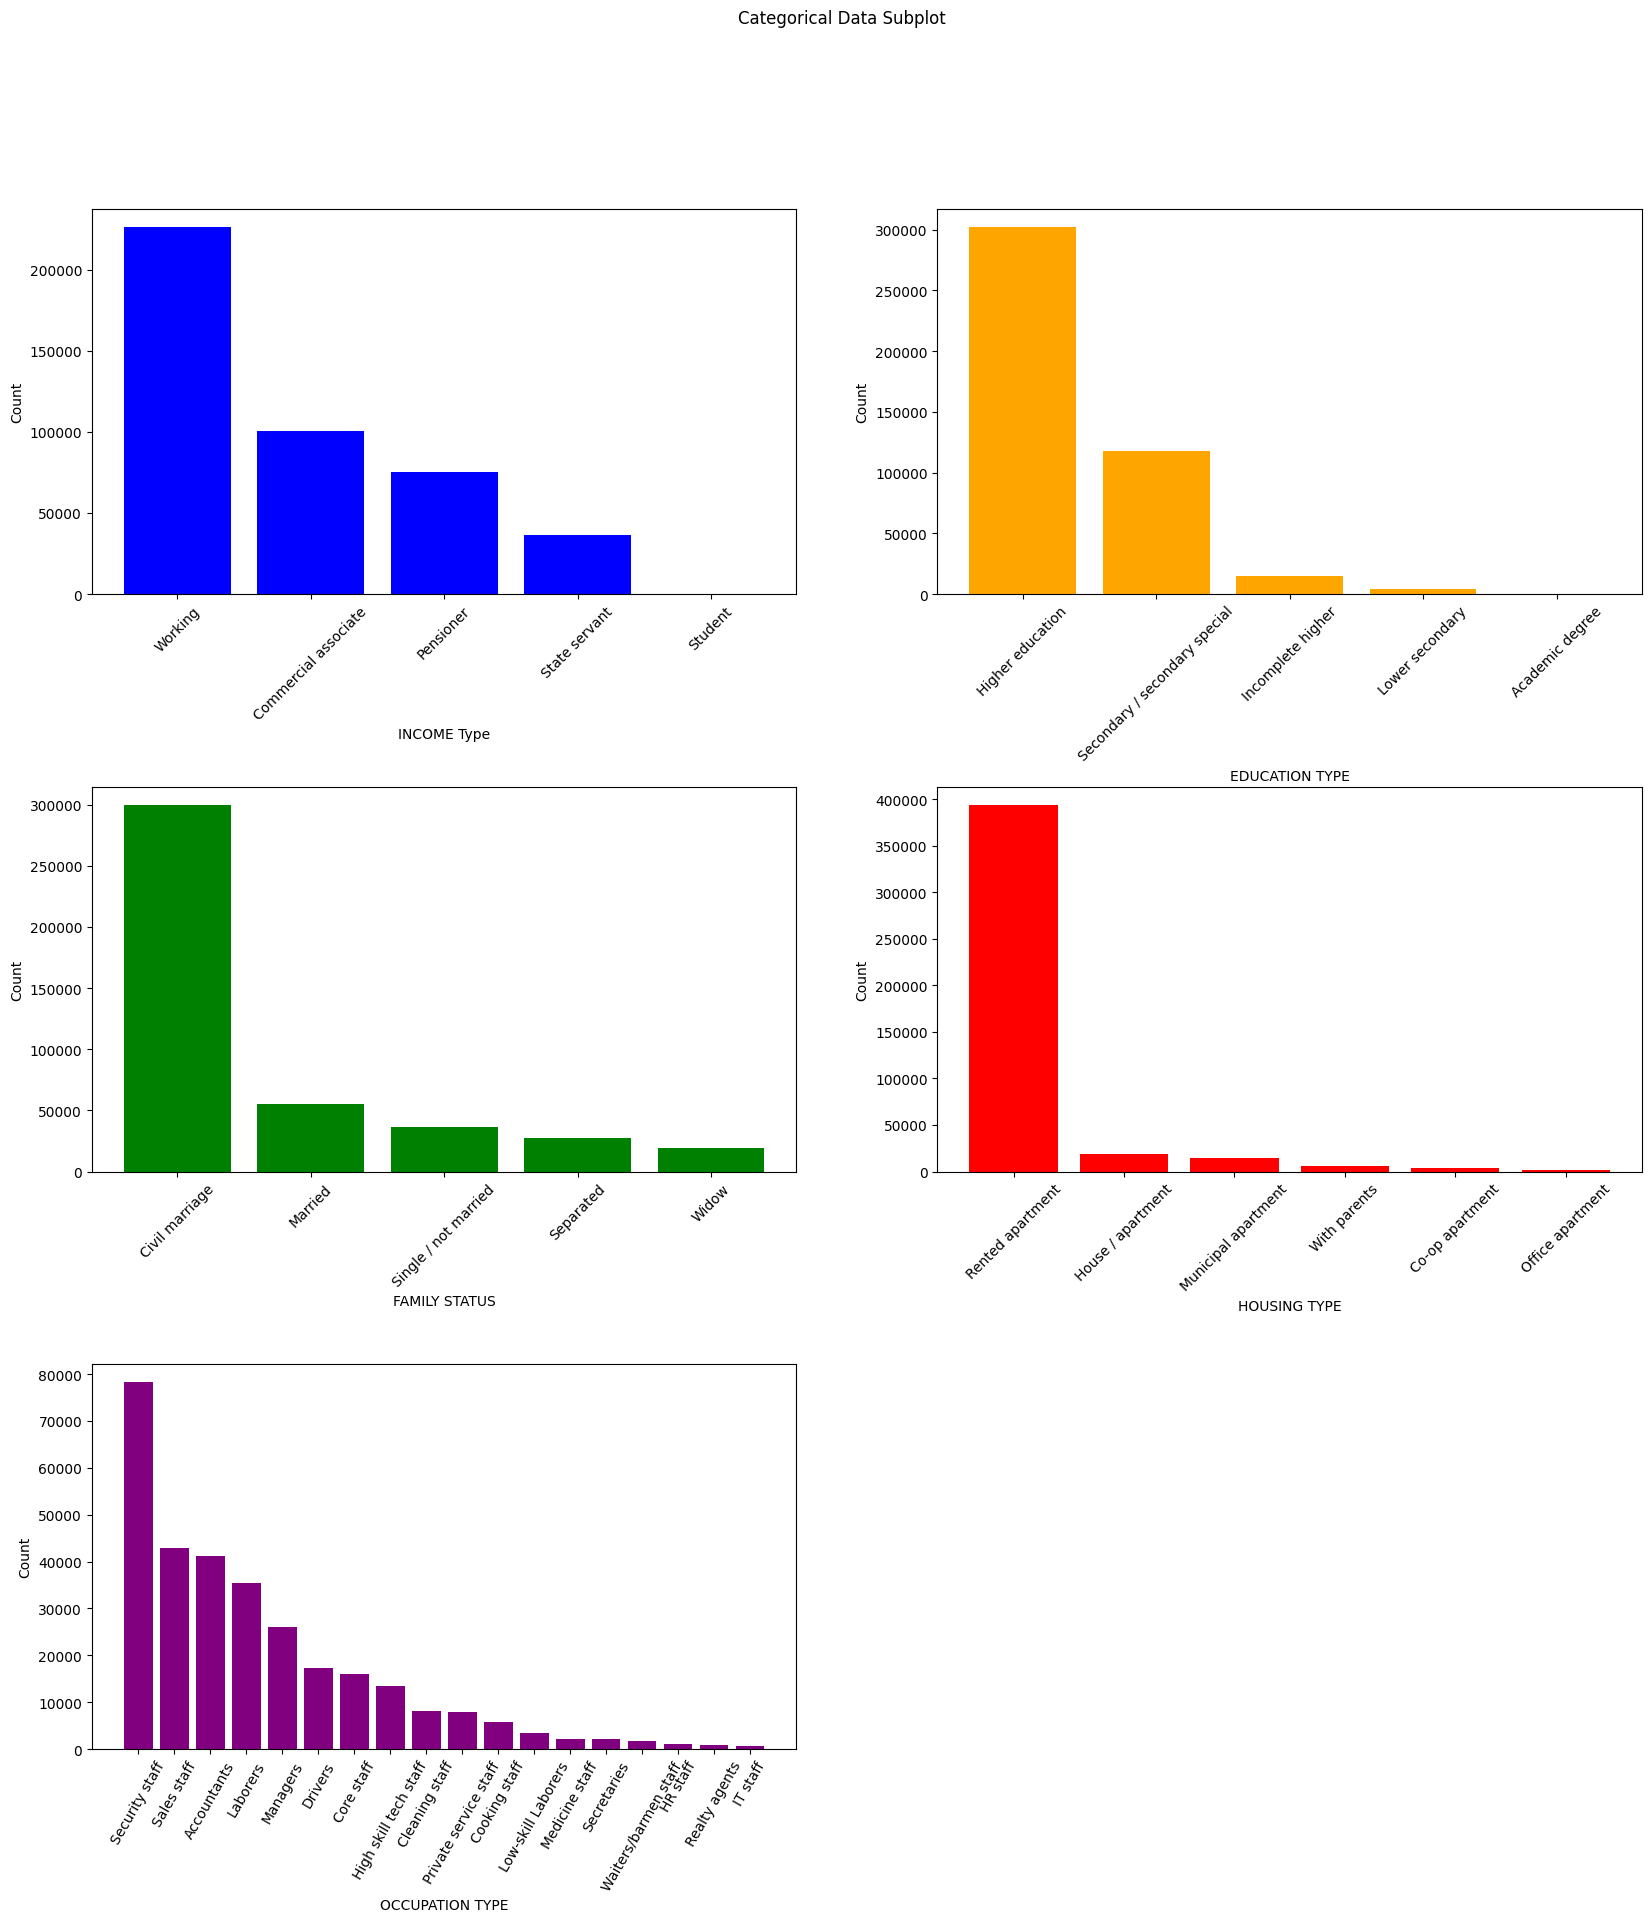

In [4]:
# Get unique categories for each column
category_1 = apprec['NAME_INCOME_TYPE'].unique()
category_2 = apprec['NAME_EDUCATION_TYPE'].unique()
category_3 = apprec['NAME_FAMILY_STATUS'].unique()
category_4 = apprec['NAME_HOUSING_TYPE'].unique()
category_5 = apprec.dropna(subset=['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].unique()

# Set up the subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5)

# Plot the data for each column in a separate subplot
axs[0,0].bar(category_1, apprec['NAME_INCOME_TYPE'].value_counts(), color='blue')
axs[0,0].set_xlabel('INCOME Type')
axs[0,0].set_ylabel('Count')
axs[0,0].tick_params(axis='x', rotation=45)

axs[0,1].bar(category_2, apprec['NAME_EDUCATION_TYPE'].value_counts(), color='orange')
axs[0,1].set_xlabel('EDUCATION TYPE')
axs[0,1].set_ylabel('Count')
axs[0,1].tick_params(axis='x', rotation=45)

axs[1,0].bar(category_3, apprec['NAME_FAMILY_STATUS'].value_counts(), color='green')
axs[1,0].set_xlabel('FAMILY STATUS')
axs[1,0].set_ylabel('Count')
axs[1,0].tick_params(axis='x', rotation=45)

axs[1,1].bar(category_4, apprec['NAME_HOUSING_TYPE'].value_counts(), color='red')
axs[1,1].set_xlabel('HOUSING TYPE')
axs[1,1].set_ylabel('Count')
axs[1,1].tick_params(axis='x', rotation=45)

axs[2,0].bar(category_5, apprec.dropna(subset=['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].value_counts(), color='purple')
axs[2,0].set_xlabel('OCCUPATION TYPE')
axs[2,0].set_ylabel('Count')
axs[2,0].tick_params(axis='x', rotation=60)

# Remove the empty subplot
fig.delaxes(axs[2,1])

# Set the title for the entire subplot
plt.suptitle('Categorical Data Subplot')

# Display the subplot
plt.show()

# Data pre-processing

# Converting Binary Features

In [5]:
# Replace the values of CODE_GENDER to binary values
apprec['CODE_GENDER'].replace({'M': 1, 'F': 0}, inplace=True)

# Rename the column to MALE
apprec.rename(columns={'CODE_GENDER': 'MALE'}, inplace=True)

# Replace the values of FLAG_OWN_CAR to binary values
apprec['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0}, inplace=True)

# Rename the column to OWN_CAR
apprec.rename(columns={'FLAG_OWN_CAR': 'OWN_CAR'}, inplace=True)

# Replace the values of FLAG_OWN_REALTY to binary values
apprec['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}, inplace=True)

# Rename the column to OWN_PROPERTY
apprec.rename(columns={'FLAG_OWN_REALTY': 'OWN_PROPERTY'}, inplace=True)

print(apprec[['MALE', 'OWN_CAR','OWN_PROPERTY']])

        MALE  OWN_CAR  OWN_PROPERTY
0          1        1             1
1          1        1             1
2          1        1             1
3          0        0             1
4          0        0             1
...      ...      ...           ...
438552     0        0             0
438553     0        0             1
438554     1        0             1
438555     0        1             1
438556     0        0             1

[438557 rows x 3 columns]


# Converting Catgorical Features

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Columns to encode
cols_to_encode = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

# Create the OneHotEncoder object
encoder = OneHotEncoder(dtype=int)

# Fit the encoder to the data and transform
onehot = encoder.fit_transform(apprec[cols_to_encode]).toarray()

# Create a dataframe of the one-hot encoded data
onehot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(cols_to_encode))

# Append the one-hot encoded columns to the original dataset
apprec = pd.concat([apprec.drop(cols_to_encode, axis=1), onehot_df], axis=1)

print(apprec.iloc[:, -40:])

        NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Pensioner  \
0                                           0                           0   
1                                           0                           0   
2                                           0                           0   
3                                           1                           0   
4                                           1                           0   
...                                       ...                         ...   
438552                                      0                           0   
438553                                      0                           0   
438554                                      0                           0   
438555                                      1                           0   
438556                                      0                           0   

        NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  \
0      

# Converting Date Features

In [7]:
# Replace DAYS_BIRTH with age
apprec['DAYS_BIRTH'] = np.floor(-apprec['DAYS_BIRTH'] / 365.25)

# Rename the column to AGE
apprec.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace=True)

# Calculate months employed
apprec['EXPERIANCE_IN_MONTHS'] = np.where(apprec['DAYS_EMPLOYED'] < 0, 
                                     np.floor(-apprec['DAYS_EMPLOYED'] / 30.4375), 
                                     np.nan)

apprec['EXPERIANCE_IN_MONTHS'].fillna(value=0, inplace=True)

apprec['EXPERIANCE_IN_MONTHS'] = apprec['EXPERIANCE_IN_MONTHS'].astype(int)

# Remove DAYS_EMPLOYED column
apprec.drop('DAYS_EMPLOYED', axis=1, inplace=True)

print(apprec[['AGE', 'EXPERIANCE_IN_MONTHS']])


         AGE  EXPERIANCE_IN_MONTHS
0       32.0                   149
1       32.0                   149
2       58.0                    37
3       52.0                   100
4       52.0                   100
...      ...                   ...
438552  36.0                   178
438553  34.0                   143
438554  27.0                     3
438555  29.0                    14
438556  43.0                   120

[438557 rows x 2 columns]


In [8]:
# find all users' account open month.
begin_month=abs(pd.DataFrame(crerec.groupby(["ID"])["MONTHS_BALANCE"].agg(min)))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'START_MONTH'})
apprec=pd.merge(apprec,begin_month,how="left",on="ID") #merge to record data

apprec['START_MONTH'].fillna(value=0, inplace=True)

apprec['START_MONTH'] = apprec['START_MONTH'].astype(int)

print(apprec[['START_MONTH']])

        START_MONTH
0                15
1                14
2                29
3                 4
4                26
...             ...
438552            0
438553            0
438554            0
438555            0
438556            0

[438557 rows x 1 columns]


# Converting Target Features 

In [9]:
crerec.loc[crerec['STATUS'] == '2', 'dep_value'] = 'Yes'
crerec.loc[crerec['STATUS'] == '3', 'dep_value'] = 'Yes'
crerec.loc[crerec['STATUS'] == '4', 'dep_value'] = 'Yes'
crerec.loc[crerec['STATUS'] == '5', 'dep_value'] = 'Yes'

crerec

ID  MONTHS_BALANCE STATUS dep_value
0        5001711               0      X       NaN
1        5001711              -1      0       NaN
2        5001711              -2      0       NaN
3        5001711              -3      0       NaN
4        5001712               0      C       NaN
...          ...             ...    ...       ...
1048570  5150487             -25      C       NaN
1048571  5150487             -26      C       NaN
1048572  5150487             -27      C       NaN
1048573  5150487             -28      C       NaN
1048574  5150487             -29      C       NaN

[1048575 rows x 4 columns]

In [10]:
cpunt=crerec.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]

print(cpunt[['dep_value']])

        dep_value
ID               
5001711        No
5001712        No
5001713        No
5001714        No
5001715        No
...           ...
5150482        No
5150483        No
5150484        No
5150485        No
5150487        No

[45985 rows x 1 columns]


In [11]:
new_data=pd.merge(apprec,cpunt,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0

new_data.rename(columns={'target': 'TARGET'}, inplace=True)

apprec = new_data.drop('dep_value', axis=1)

In [12]:
import re
apprec['TARGET'] = pd.to_numeric(apprec['TARGET'].apply(lambda x: re.sub(r'[^\d\.]', '', str(x))), errors='coerce')

In [13]:
apprec

ID  MALE  OWN_CAR  OWN_PROPERTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      5008804     1        1             1             0          427500.0   
1      5008805     1        1             1             0          427500.0   
2      5008806     1        1             1             0          112500.0   
3      5008808     0        0             1             0          270000.0   
4      5008809     0        0             1             0          270000.0   
...        ...   ...      ...           ...           ...               ...   
36452  5150482     0        1             1             1          157500.0   
36453  5150483     0        1             1             1          157500.0   
36454  5150484     0        1             1             1          157500.0   
36455  5150485     0        1             1             1          157500.0   
36456  5150487     1        1             0             0          202500.0   

        AGE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  ...  \
0      32.0           1                1           0  ...   
1      32.0           1                1           0  ...   
2      58.0           1                0           0  ...   
3      52.0           1                0           1  ...   
4      52.0           1                0           1  ...   
...     ...         ...              ...         ...  ...   
36452  29.0           1                0           0  ...   
36453  29.0           1                0           0  ...   
36454  29.0           1                0           0  ...   
36455  29.0           1                0           0  ...   
36456  53.0           1                0           0  ...   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   
...                                      ...                            ...   
36452                                      0                              0   
36453                                      0                              0   
36454                                      0                              0   
36455                                      0                              0   
36456                                      0                              0   

       OCCUPATION_TYPE_Sales staff  OCCUPATION_TYPE_Secretaries  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                1                            0   
4                                1                            0   
...                            ...                          ...   
36452                            0                            0   
36453                            0                            0   
36454                            0                            0   
36455                            0                            0   
36456                            0                            0   

       OCCUPATION_TYPE_Security staff  OCCUPATION_TYPE_Waiters/barmen staff  \
0                                   0                                     0   
1                                   0                                     0   
2                                   1                                     0   
3                                   0                                     0   
4                                   0                                     0   
...                               ...                                   ...   
36452                  

In [14]:
apprec.shape

(36457, 55)

In [15]:
apprec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   MALE                                               36457 non-null  int64  
 2   OWN_CAR                                            36457 non-null  int64  
 3   OWN_PROPERTY                                       36457 non-null  int64  
 4   CNT_CHILDREN                                       36457 non-null  int64  
 5   AMT_INCOME_TOTAL                                   36457 non-null  float64
 6   AGE                                                36457 non-null  float64
 7   FLAG_MOBIL                                         36457 non-null  int64  
 8   FLAG_WORK_PHONE                                    36457 non-null  int64  
 9   FLAG_P

In [16]:
apprec.isnull().sum()

ID                                                   0
MALE                                                 0
OWN_CAR                                              0
OWN_PROPERTY                                         0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AGE                                                  0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCA

# Feature Selection

In [18]:
apprec.corr().T

ID      MALE  \
ID                                                 1.000000  0.012022   
MALE                                               0.012022  1.000000   
OWN_CAR                                           -0.011163  0.361379   
OWN_PROPERTY                                      -0.098851 -0.050758   
CNT_CHILDREN                                       0.028878  0.077690   
AMT_INCOME_TOTAL                                  -0.017667  0.197805   
AGE                                               -0.056346 -0.202286   
FLAG_MOBIL                                              NaN       NaN   
FLAG_WORK_PHONE                                    0.079215  0.064994   
FLAG_PHONE                                         0.009879 -0.026833   
FLAG_EMAIL                                        -0.046979 -0.003284   
CNT_FAM_MEMBERS                                    0.026624  0.110782   
NAME_INCOME_TYPE_Commercial associate             -0.001703  0.021558   
NAME_INCOME_TYPE_Pensioner                        -0.038256 -0.174695   
NAME_INCOME_TYPE_State servant                     0.011081 -0.042287   
NAME_INCOME_TYPE_Student                          -0.024747 -0.008830   
NAME_INCOME_TYPE_Working                           0.024892  0.136200   
NAME_EDUCATION_TYPE_Academic degree               -0.004754 -0.005037   
NAME_EDUCATION_TYPE_Higher education               0.009661 -0.011437   
NAME_EDUCATION_TYPE_Incomplete higher              0.001884  0.019620   
NAME_EDUCATION_TYPE_Lower secondary               -0.006791  0.003832   
NAME_EDUCATION_TYPE_Secondary / secondary special -0.008208  0.002273   
NAME_FAMILY_STATUS_Civil marriage                 -0.009493 -0.021525   
NAME_FAMILY_STATUS_Married                         0.011567  0.106914   
NAME_FAMILY_STATUS_Separated                      -0.019093 -0.062499   
NAME_FAMILY_STATUS_Single / not married            0.021528 -0.003970   
NAME_FAMILY_STATUS_Widow                          -0.028026 -0.138521   
NAME_HOUSING_TYPE_Co-op apartment                  0.016169  0.021171   
NAME_HOUSING_TYPE_House / apartment               -0.026219 -0.063438   
NAME_HOUSING_TYPE_Municipal apartment              0.010878 -0.015876   
NAME_HOUSING_TYPE_Office apartment                 0.019724  0.040450   
NAME_HOUSING_TYPE_Rented apartment                -0.013056  0.046969   
NAME_HOUSING_TYPE_With parents                     0.023663  0.054229   
OCCUPATION_TYPE_Accountants                        0.028471 -0.119489   
OCCUPATION_TYPE_Cleaning staff                    -0.007817 -0.077355   
OCCUPATION_TYPE_Cooking staff                     -0.007947 -0.058450   
OCCUPATION_TYPE_Core staff                        -0.001217 -0.091360   
OCCUPATION_TYPE_Drivers                           -0.013075  0.322458   
OCCUPATION_TYPE_HR staff                          -0.001435 -0.025452   
OCCUPATION_TYPE_High skill tech staff             -0.002687 -0.010152   
OCCUPATION_TYPE_IT staff                           0.015805  0.019007   
OCCUPATION_TYPE_Laborers                           0.000148  0.240526   
OCCUPATION_TYPE_Low-skill Laborers                 0.008097  0.067752   
OCCUPATION_TYPE_Managers                          -0.002743  0.093315   
OCCUPATION_TYPE_Medicine staff                     0.014370 -0.115488   
OCCUPATION_TYPE_Private service staff              0.014616 -0.053998   
OCCUPATION_TYPE_Realty agents                      0.012489 -0.020151   
OCCUPATION_TYPE_Sales staff                        0.007745 -0.133468   
OCCUPATION_TYPE_Secretaries                        0.006347 -0.040708   
OCCUPATION_TYPE_Security staff                     0.005772  0.102794   
OCCUPATION_TYPE_Waiters/barmen staff               0.035343 -0.024041   
OCCUPATION_TYPE_nan                               -0.021724 -0.152854   
EXPERIANCE_IN_MONTHS                              -0.005761 -0.032241   
START_MONTH                                       -0.001364 -0.005079   
TARGET                                    

In [19]:
cor = apprec.corr()
#Correlation with output variable
cor_target = abs(cor['TARGET'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

ID                                         0.015588
MALE                                       0.015292
OWN_PROPERTY                               0.022247
NAME_INCOME_TYPE_Pensioner                 0.014804
NAME_INCOME_TYPE_State servant             0.010430
NAME_EDUCATION_TYPE_Incomplete higher      0.010128
NAME_FAMILY_STATUS_Married                 0.013873
NAME_FAMILY_STATUS_Single / not married    0.012184
NAME_FAMILY_STATUS_Widow                   0.020275
NAME_HOUSING_TYPE_Municipal apartment      0.013447
NAME_HOUSING_TYPE_Office apartment         0.011522
OCCUPATION_TYPE_Drivers                    0.011662
OCCUPATION_TYPE_IT staff                   0.010428
OCCUPATION_TYPE_Low-skill Laborers         0.015529
OCCUPATION_TYPE_Medicine staff             0.012364
OCCUPATION_TYPE_Sales staff                0.010050
EXPERIANCE_IN_MONTHS                       0.022708
START_MONTH                                0.060215
TARGET                                     1.000000
Name: TARGET

# Model Building

# Models using statsmodel

# Logistic Classifier

In [20]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(apprec, test_size=0.2, random_state=42)

# define the target variable and predictor variables
target_col = 'TARGET'
predictor_cols = ['ID','MALE','OWN_PROPERTY','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_EDUCATION_TYPE_Incomplete higher','NAME_FAMILY_STATUS_Married','NAME_FAMILY_STATUS_Single / not married','NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_Municipal apartment','NAME_HOUSING_TYPE_Office apartment','OCCUPATION_TYPE_Drivers','OCCUPATION_TYPE_IT staff','OCCUPATION_TYPE_Low-skill Laborers','OCCUPATION_TYPE_Medicine staff','OCCUPATION_TYPE_Sales staff','EXPERIANCE_IN_MONTHS','START_MONTH']

# fit logistic regression model on the training data
logit = sm.Logit(train[target_col], train[predictor_cols])
result = logit.fit()

# make predictions on the test data
test['Predictions'] = result.predict(test[predictor_cols])

# calculate the accuracy of the model on the test data
test['Predictions_rounded'] = test['Predictions'].round()
accuracy = sum(test['Predictions_rounded'] == test[target_col]) / len(test)
print('Accuracy: ', accuracy)

Optimization terminated successfully.
         Current function value: 0.083692
         Iterations 9
Accuracy:  0.984503565551289


In [21]:
# print the summary of the model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                29165
Model:                          Logit   Df Residuals:                    29147
Method:                           MLE   Df Model:                           17
Date:                Wed, 10 May 2023   Pseudo R-squ.:                 0.03936
Time:                        21:07:03   Log-Likelihood:                -2440.9
converged:                       True   LL-Null:                       -2540.9
Covariance Type:            nonrobust   LLR p-value:                 2.812e-33
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
ID                                      -9.213e-07   3.59e-08    -25.697      0.000   -9.92e-07   -8.51e-07
MALE                                        

# Models using sklearn

# Defining the target and the predictor columns

In [22]:
target_col = apprec['TARGET']
predictor_cols = apprec[['ID','MALE','OWN_PROPERTY','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_EDUCATION_TYPE_Incomplete higher','NAME_FAMILY_STATUS_Married','NAME_FAMILY_STATUS_Single / not married','NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_Municipal apartment','NAME_HOUSING_TYPE_Office apartment','OCCUPATION_TYPE_Drivers','OCCUPATION_TYPE_IT staff','OCCUPATION_TYPE_Low-skill Laborers','OCCUPATION_TYPE_Medicine staff','OCCUPATION_TYPE_Sales staff','EXPERIANCE_IN_MONTHS','START_MONTH']]

# Spliting the dataset into train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictor_cols, target_col, test_size=0.2, random_state=1)

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scale the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Classifier

In [25]:
# Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Prediction

In [26]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Matrix and Accuracy

In [27]:
# Making the confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7186    0]
 [ 106    0]]


0.9854635216675809

# ROC Curve

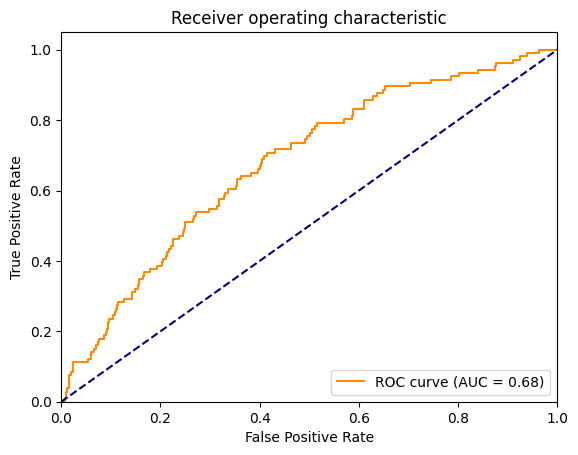

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Precision and Recall

In [29]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 1.000
Recall: 0.000


# Decision Tree

In [30]:
# Training the Decision Tree on the Training set

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Prediction

In [31]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Matrix and Accuracy

In [32]:
# Making the confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7068  118]
 [  91   15]]


0.9713384530992869

# ROC Curve

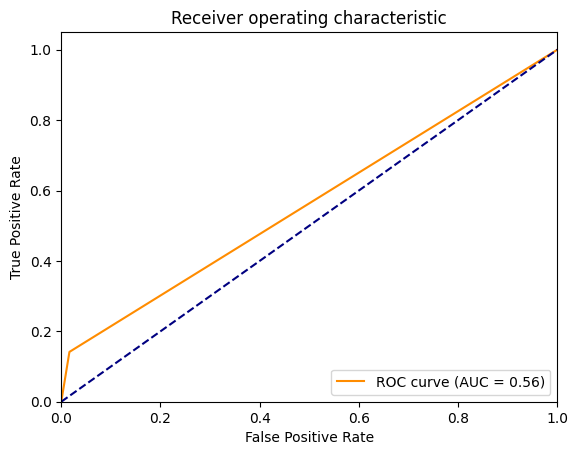

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision and Recall

In [34]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 0.113
Recall: 0.142


# Plotting the Decision Tree

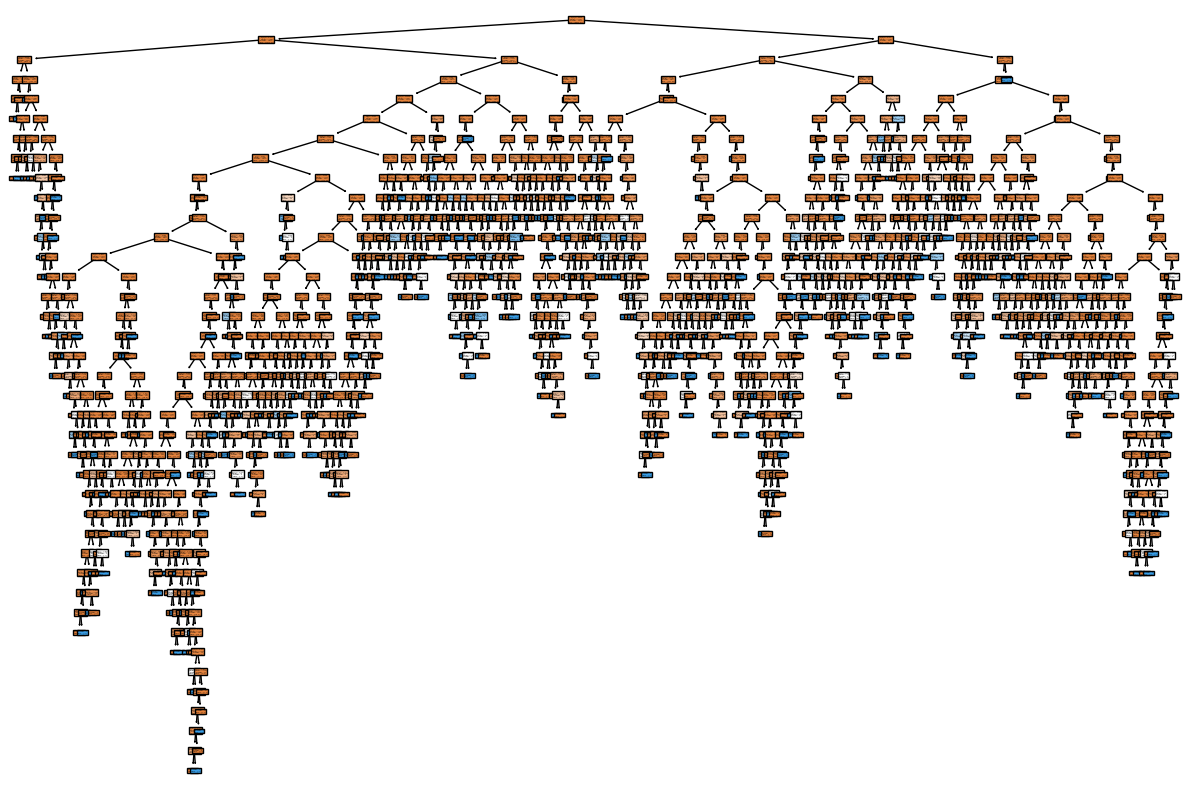

In [35]:
# Plotting the Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(classifier, filled=True)
plt.show()

#  Random Forest

In [36]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Prediction

In [37]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Matrix and Accuracy

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7167   19]
 [  99    7]]


0.9838178826110806

# ROC Curve

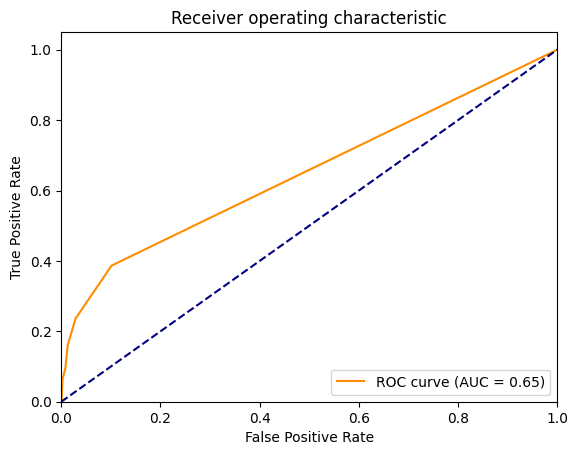

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Precision and Recall

In [40]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 0.269
Recall: 0.066


# Plotting the Random Forest

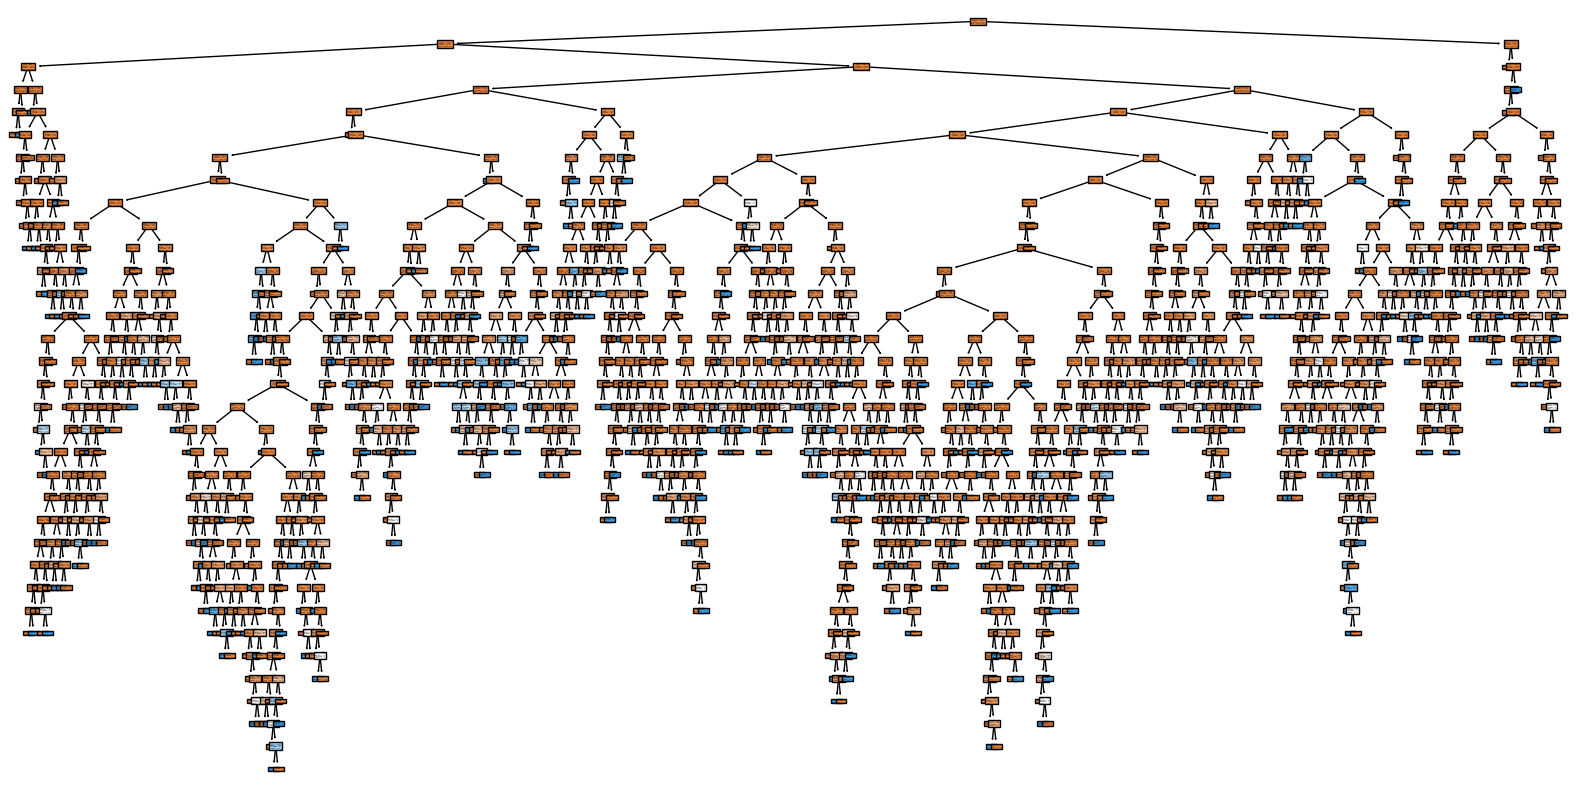

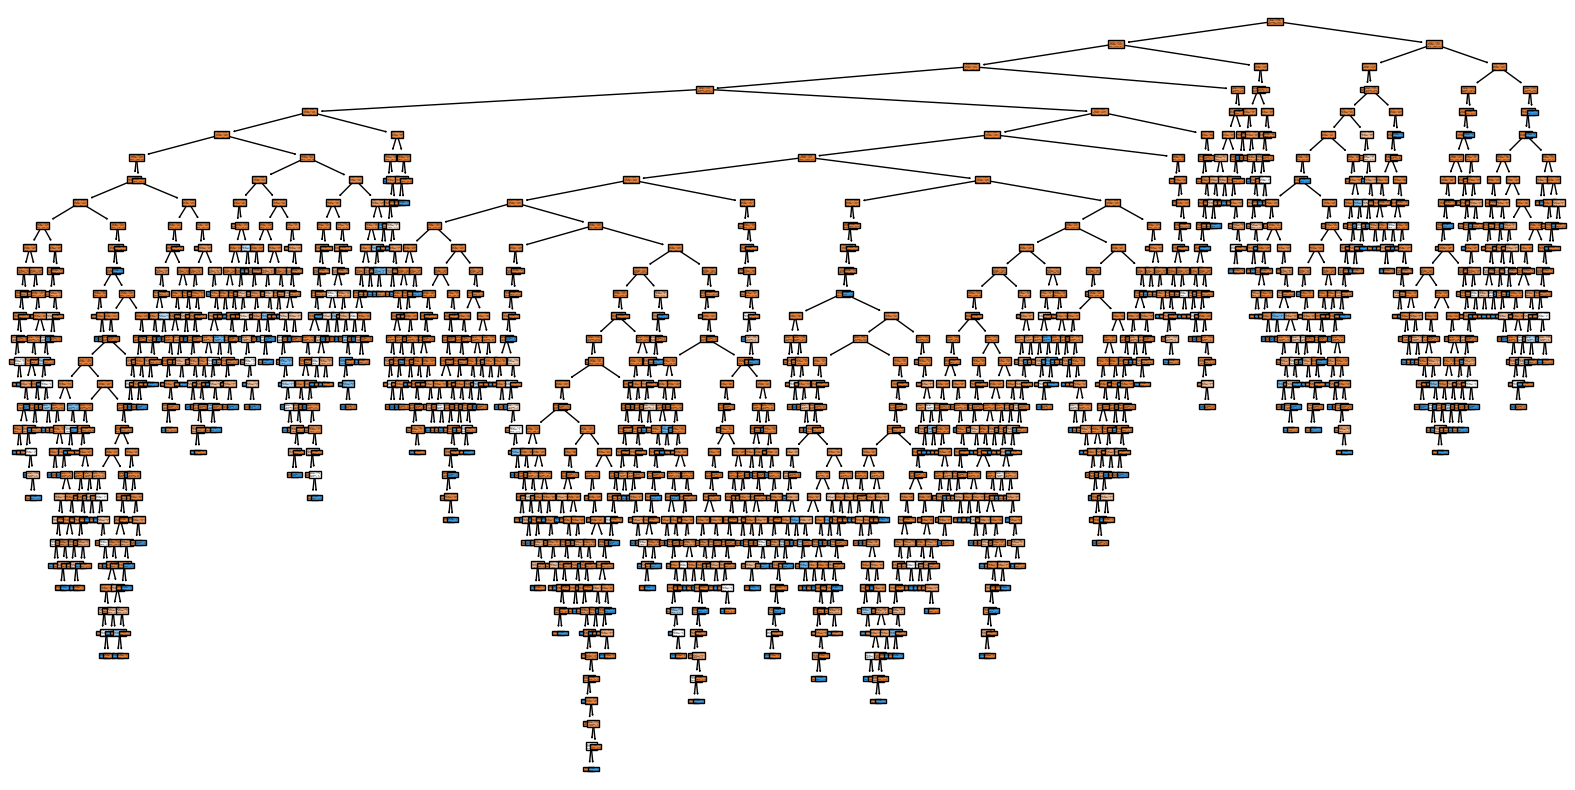

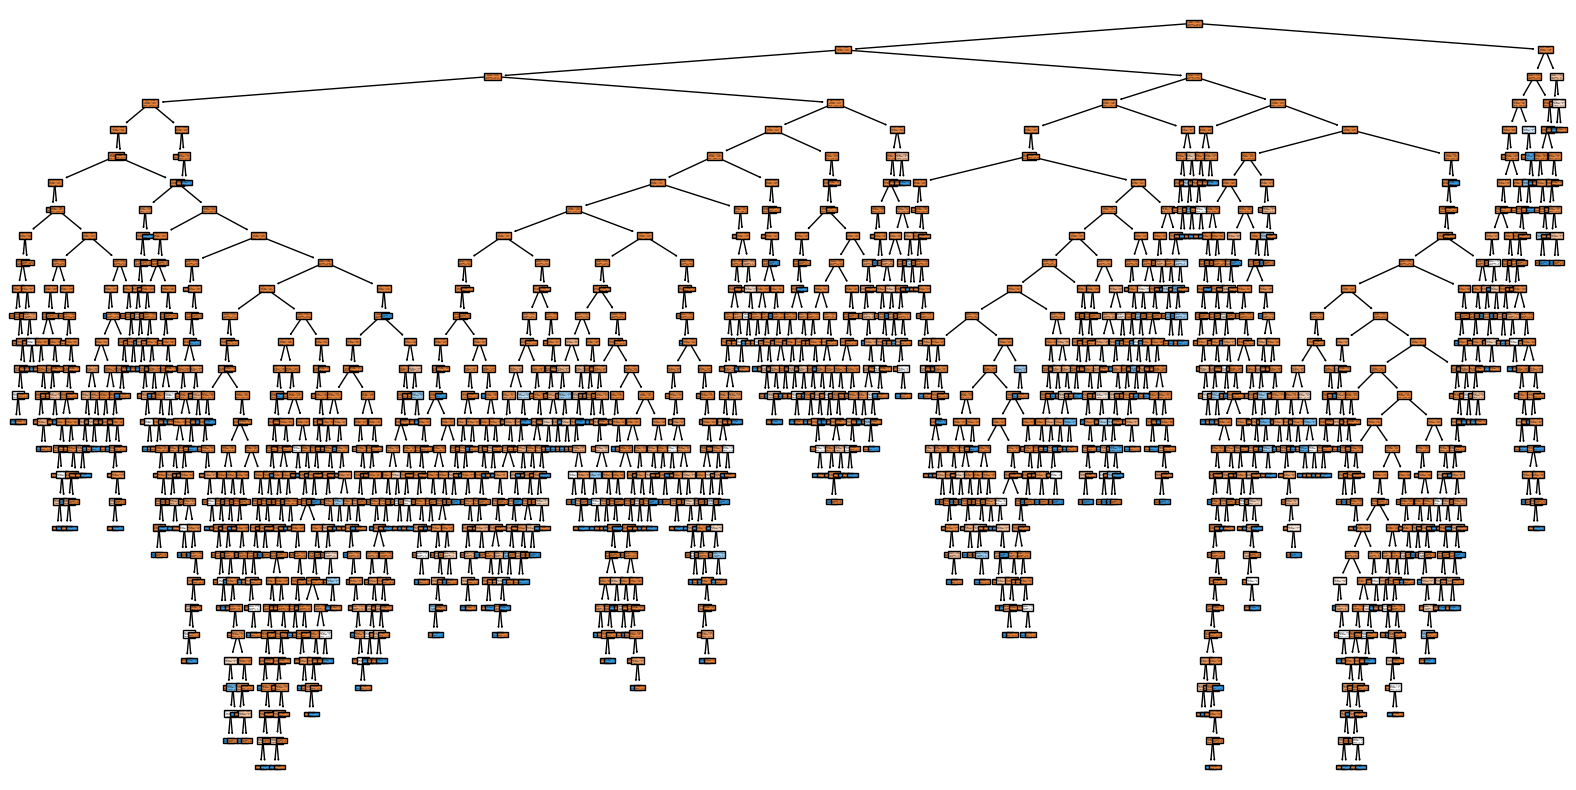

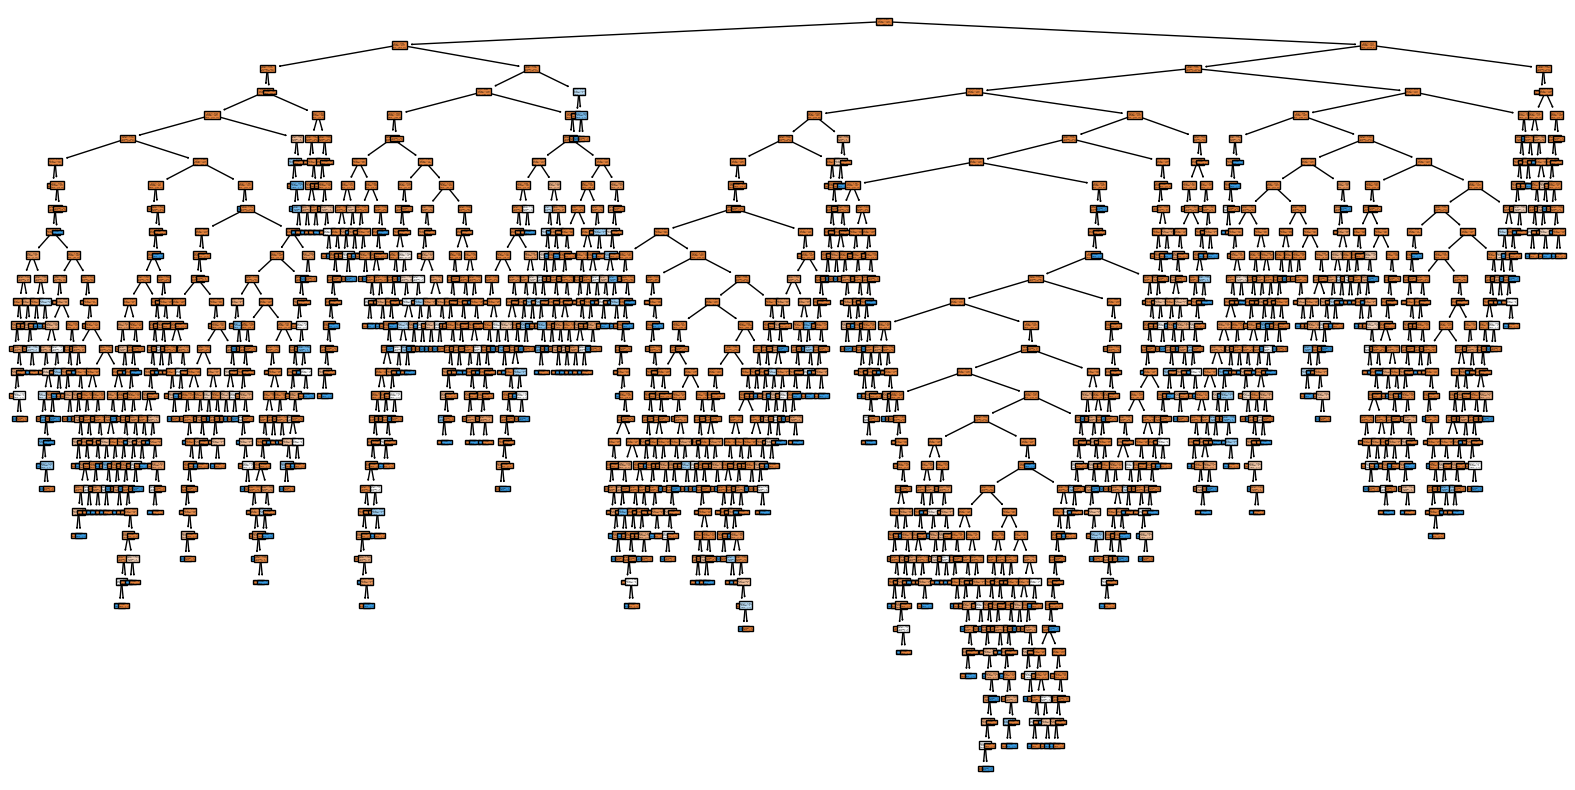

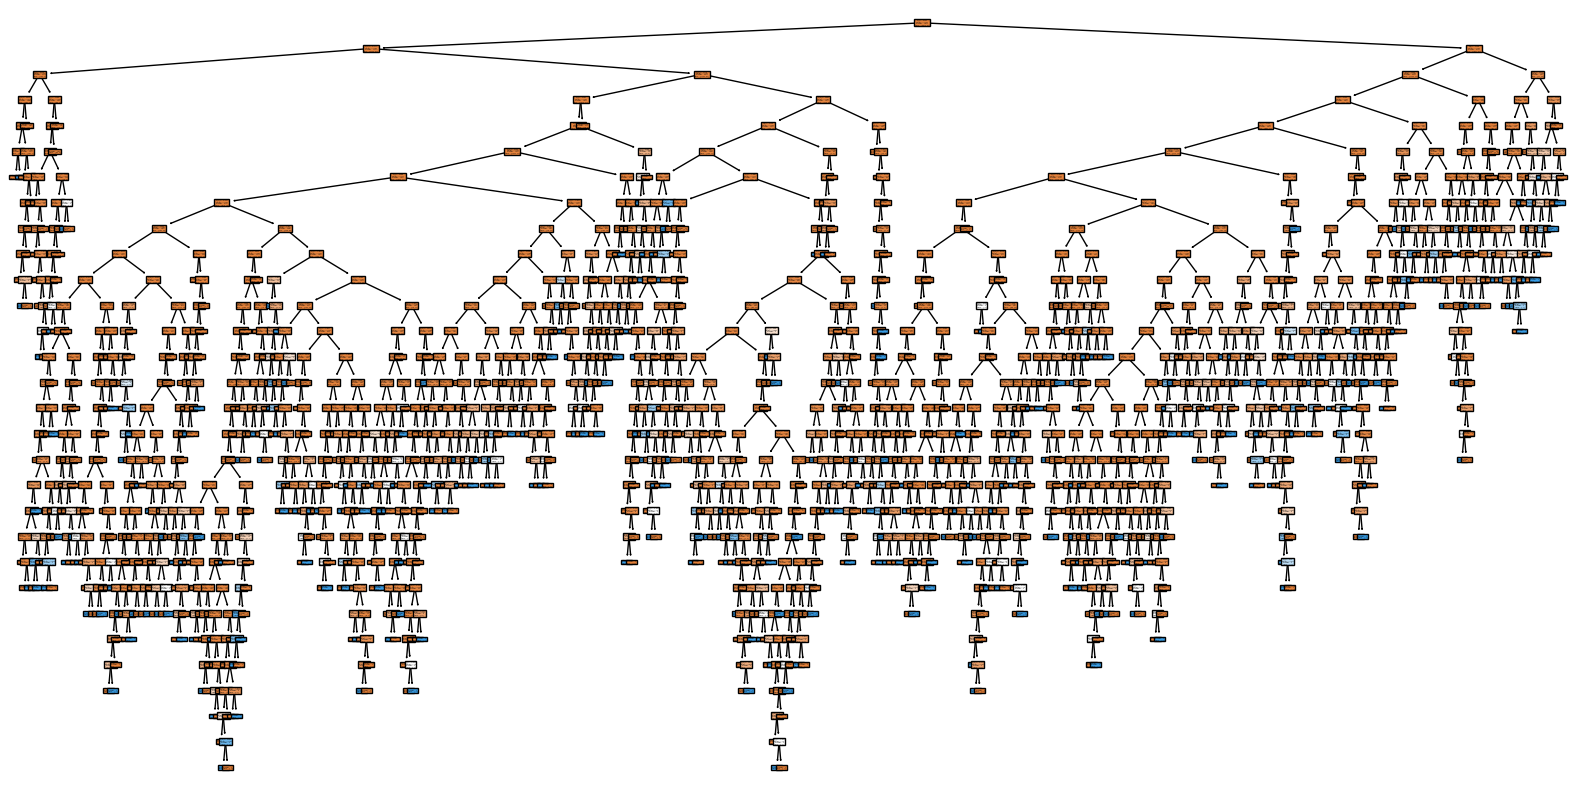

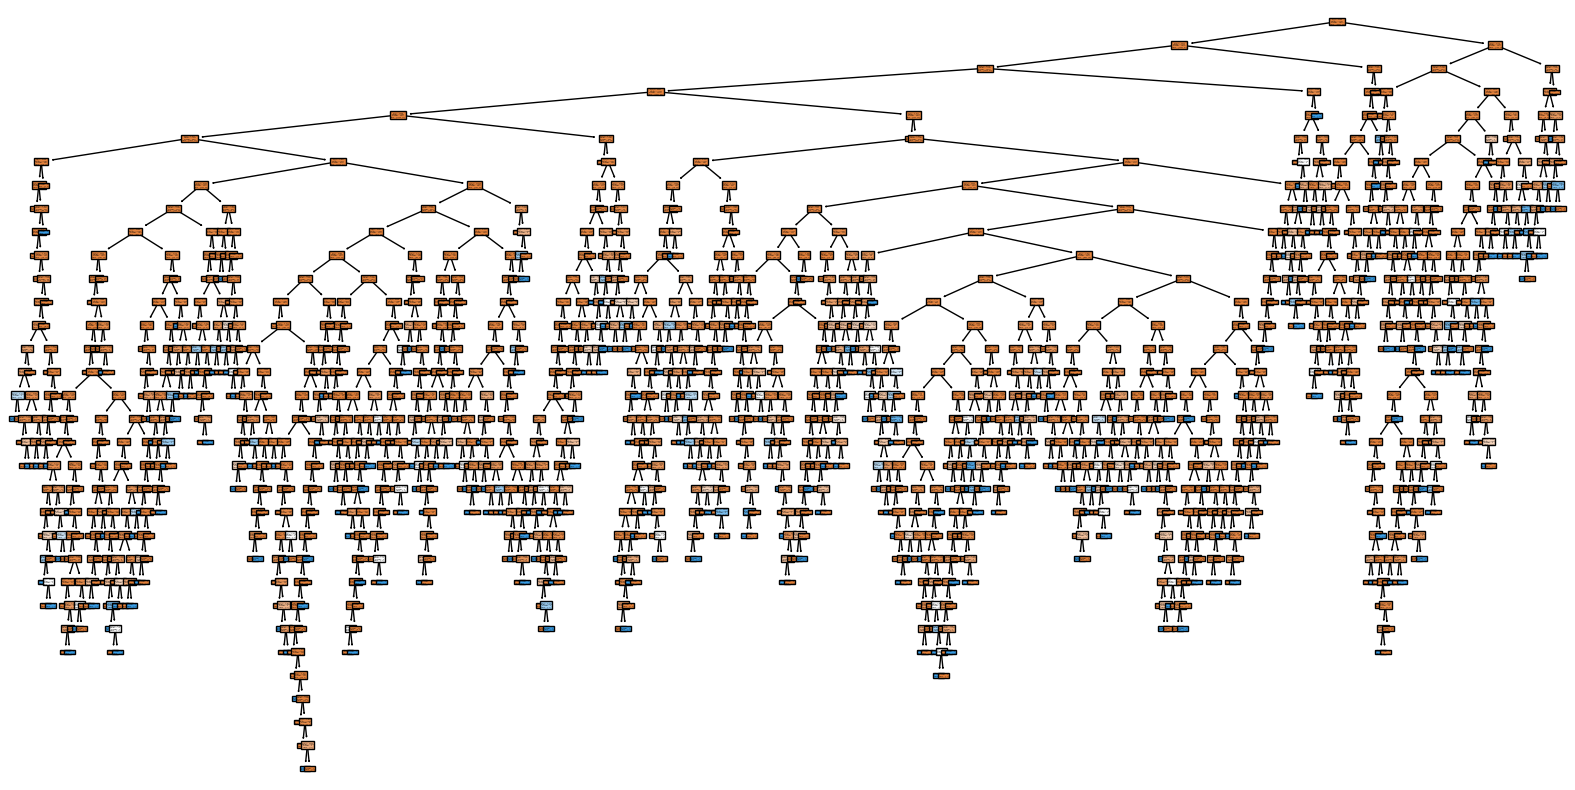

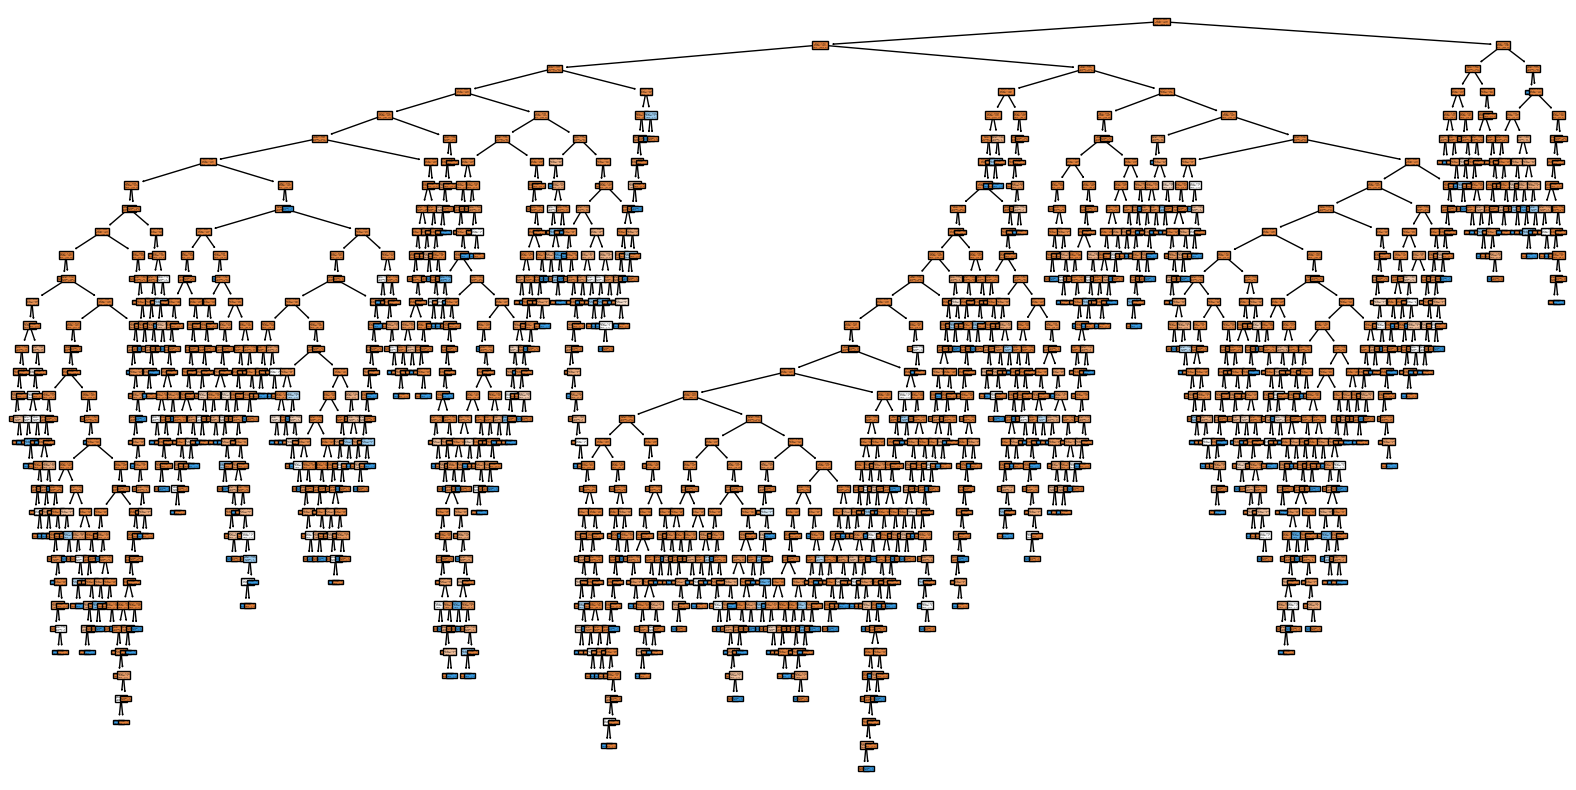

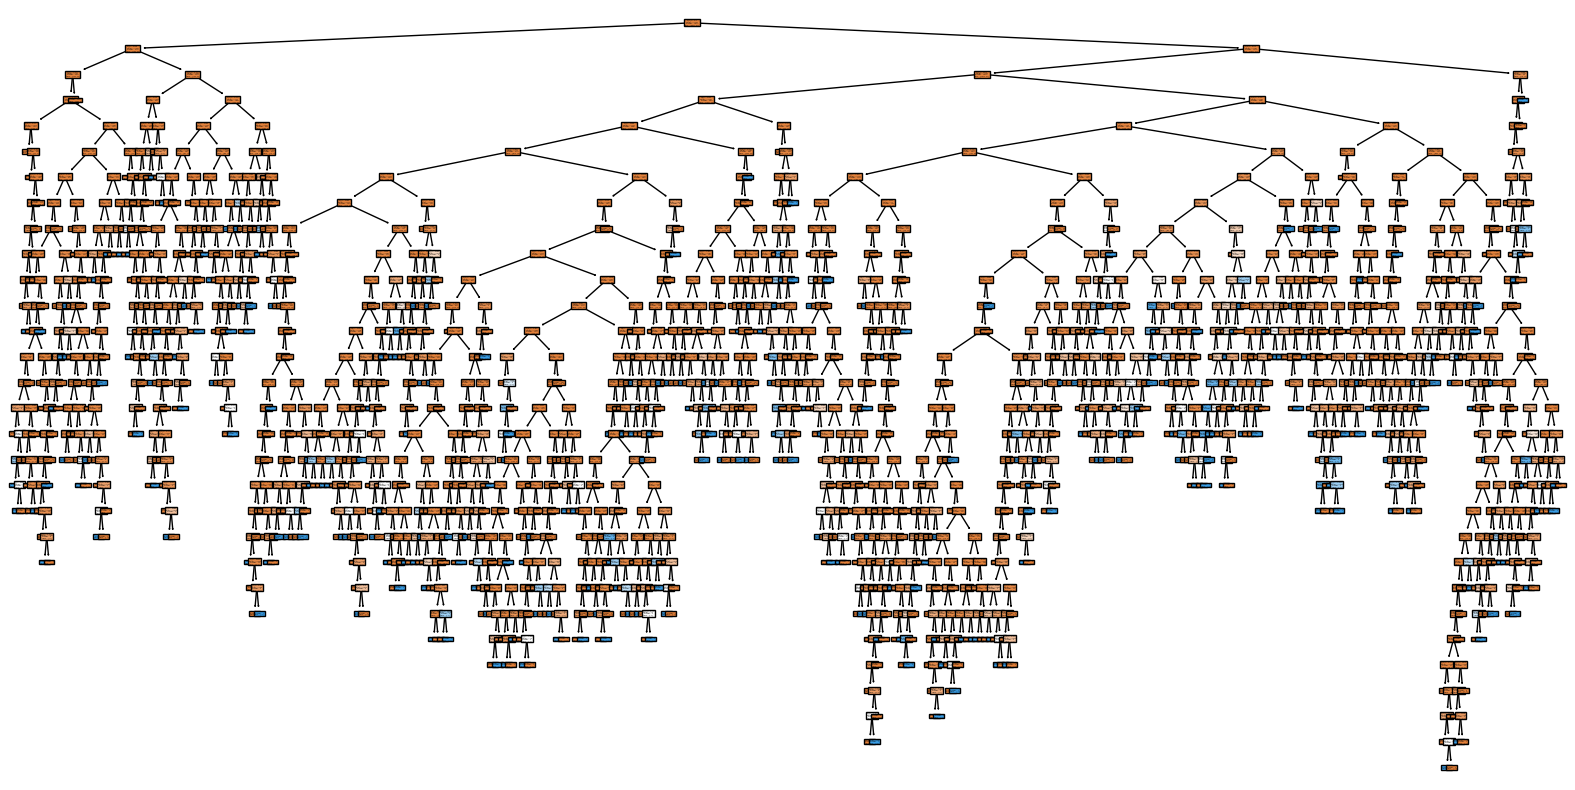

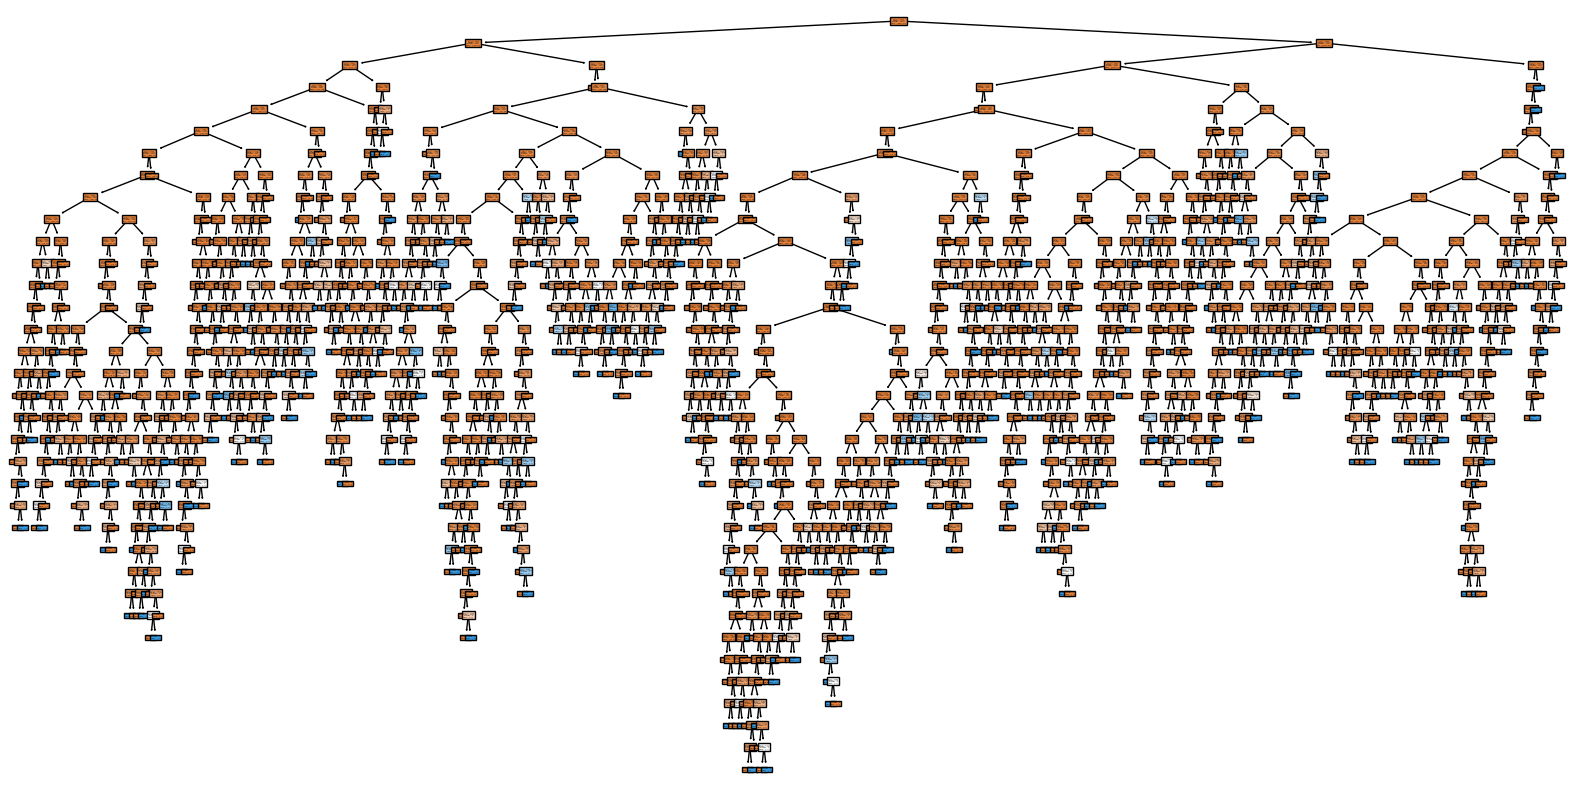

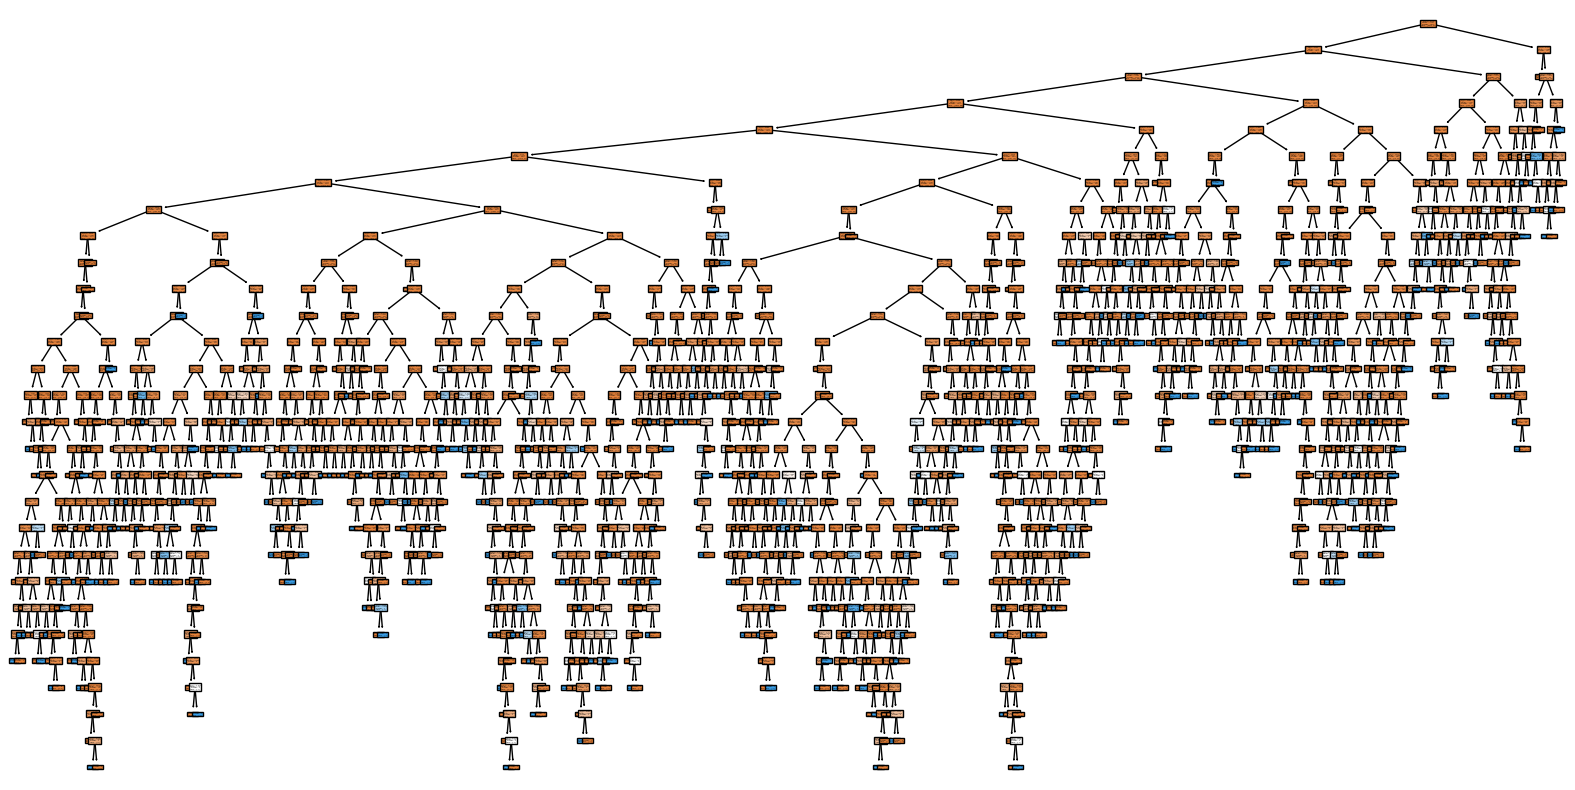

In [41]:
for tree in classifier.estimators_:
    plt.figure(figsize=(20,10))
    plot_tree(tree, filled=True)
    plt.show()

# Support Vector Machine

In [42]:
# Training the Support Vector Classification model on the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

# Prediction

In [43]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Matrix and Accuracy

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7186    0]
 [ 106    0]]


0.9854635216675809

# ROC Curve

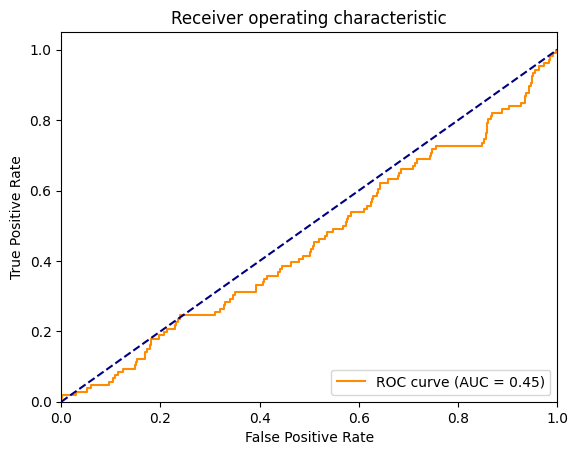

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision and Recall

In [46]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 1.000
Recall: 0.000


# Gaussian Naive Bayes

In [47]:
# Training the Naive Bayes model on the Training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Prediction

In [48]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Matrix and Accuracy

In [49]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7019  167]
 [  99    7]]


0.9635216675809106

# ROC Curve

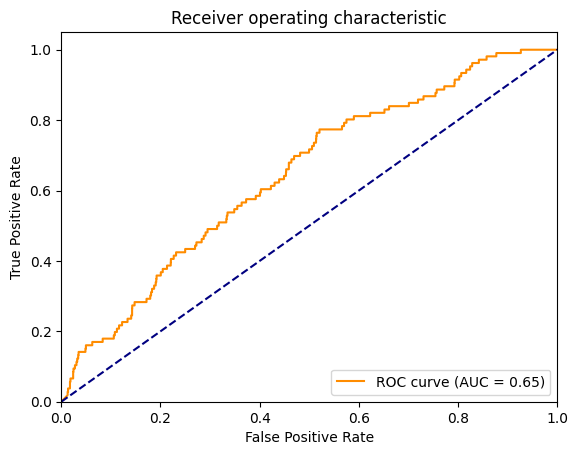

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision and Recall

In [51]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 0.040
Recall: 0.066


# Voting

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create the classifiers
clf1 = LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = RandomForestClassifier(n_estimators=50, random_state=1)
clf4 = GaussianNB()
clf5 = SVC(probability=True, random_state=1)

# Create the hard voting ensemble
eclf_hard = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('gnb', clf4), ('svm', clf5)], voting='hard')

# Train the hard voting ensemble
eclf_hard.fit(X_train, y_train)

# Make predictions with the hard voting ensemble and calculate accuracy
y_pred_hard = eclf_hard.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)
print('Hard Voting Accuracy: {:.2f}'.format(acc_hard))

# Create the soft voting ensemble
eclf_soft = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3), ('gnb', clf4), ('svm', clf5)], voting='soft')

# Train the soft voting ensemble
eclf_soft.fit(X_train, y_train)

# Make predictions with the soft voting ensemble and calculate accuracy
y_pred_soft = eclf_soft.predict(X_test)
acc_soft = accuracy_score(y_test, y_pred_soft)
print('Soft Voting Accuracy: {:.2f}'.format(acc_soft))


Hard Voting Accuracy: 0.99
Soft Voting Accuracy: 0.99


# XG boost

In [53]:
from xgboost import XGBClassifier

# Training XGBoost on the Training set
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Prediction

In [54]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7179    7]
 [ 102    4]]


0.9850521119034559

# ROC Curve

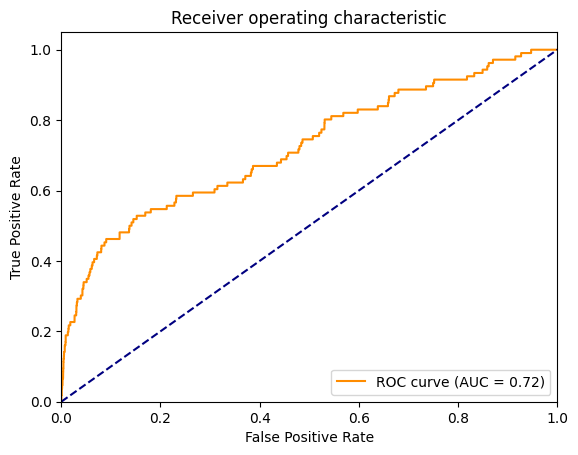

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision and Recall

In [57]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 0.364
Recall: 0.038


# Neural Networks

# Building the ANN

In [58]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [59]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [60]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [61]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [62]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
912/912 [==============================] - 4s 3ms/step - loss: 0.1653 - accuracy: 0.9687
Epoch 2/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9825
Epoch 3/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0865 - accuracy: 0.9825
Epoch 4/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0856 - accuracy: 0.9825
Epoch 5/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0852 - accuracy: 0.9825
Epoch 6/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.9825
Epoch 7/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0848 - accuracy: 0.9825
Epoch 8/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0847 - accuracy: 0.9825
Epoch 9/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0845 - accuracy: 0.9825
Epoch 10/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0844 - accura

912/912 [==============================] - 3s 3ms/step - loss: 0.0823 - accuracy: 0.9825
Epoch 82/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0824 - accuracy: 0.9825
Epoch 83/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0823 - accuracy: 0.9825
Epoch 84/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0823 - accuracy: 0.9825
Epoch 85/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0822 - accuracy: 0.9825
Epoch 86/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0823 - accuracy: 0.9825
Epoch 87/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0822 - accuracy: 0.9825
Epoch 88/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0822 - accuracy: 0.9825
Epoch 89/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0821 - accuracy: 0.9825
Epoch 90/100
912/912 [==============================] - 2s 3ms/step - loss: 0.0821 - accuracy: 

# Prediction

In [64]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

228/228 [==============================] - 1s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Model Evaluation

# Confusion Marix and Accuracy

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7186    0]
 [ 106    0]]


0.9854635216675809

# ROC Curve

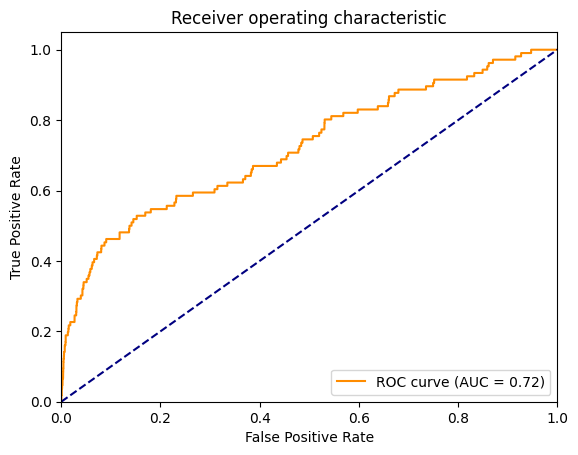

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision and Recall

In [67]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the results
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Precision: 1.000
Recall: 0.000


# Comparing the Accuracy of all the Models

In [68]:
import pandas as pd

# Create a list of dictionaries with data
data = [{'Model': 'Logistic Classifier', 'Accuracy': '0.98'},
        {'Model': 'Decision Tree', 'Accuracy': '0.97'},
        {'Model': 'Random Forest', 'Accuracy': '0.98'},
        {'Model': 'Support Vector Machine', 'Accuracy': '0.98'},
        {'Model': 'Gaussian Naive Bayes', 'Accuracy': '0.96'},
        {'Model': 'Voting', 'Accuracy': '0.99'},
        {'Model': 'XGBoost', 'Accuracy': '0.98'},
        {'Model': 'Neural Network', 'Accuracy': '0.98'}
       ]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                    Model Accuracy
0     Logistic Classifier     0.98
1           Decision Tree     0.97
2           Random Forest     0.98
3  Support Vector Machine     0.98
4    Gaussian Naive Bayes     0.96
5                  Voting     0.99
6                 XGBoost     0.98
7          Neural Network     0.98
